<a href="https://colab.research.google.com/github/vicknentura/tripleten7/blob/main/Triple_Ten_Assignment_7.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Step 1: Initialization of Coding Environment**
Cloning GitHub repository into CoLab to initialize the virtual coding environment

In [ ]:
!git clone https://github.com/vicknentura/tripleten7

Cloning into 'tripleten7'...
remote: Enumerating objects: 17, done.
remote: Counting objects: 100% (17/17), done.
remote: Compressing objects: 100% (14/14), done.
remote: Total 17 (delta 4), reused 0 (delta 0), pack-reused 0
Receiving objects: 100% (17/17), 48.53 KiB | 1.80 MiB/s, done.
Resolving deltas: 100% (4/4), done.


In [ ]:
%cd /content/tripleten7

/content/tripleten7


# **Step 2: Initialization of Workbook**


In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import itertools
import scipy.stats as stats
import sklearn

In [ ]:
try:
    users_behavior = pd.read_csv("/content/tripleten7/users_behavior.csv")
except FileNotFoundError:
    print("One or more CSV files not found. Please check file paths.")

In [ ]:
users_behavior.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3214 entries, 0 to 3213
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   calls     3214 non-null   float64
 1   minutes   3214 non-null   float64
 2   messages  3214 non-null   float64
 3   mb_used   3214 non-null   float64
 4   is_ultra  3214 non-null   int64  
dtypes: float64(4), int64(1)
memory usage: 125.7 KB


In [ ]:
# Quality assurance (QA) check to identify any irregularities in the datasets

def qa_check(df):
    print(f"Checking {df.shape[0]} rows and {df.shape[1]} columns in DataFrame...")

    #Check data structure
    users_behavior.info()

    # Check for duplicates
    dup_count = df.duplicated().sum()
    print()
    print(f"Duplicates found: {dup_count}")
    print()

    # Count zeros
    zero_count = (df == 0).sum().sum()
    print(f"Zeros found: {zero_count}")
    print()

    # Count null/nan an inf/-inf
    df_inf = df.replace([np.inf, -np.inf], np.nan)
    nan_count = df_inf.isnull().sum().sum()
    print(f"Null/NaN values found: {nan_count}")
    print()

qa_check(users_behavior)

Checking 3214 rows and 5 columns in DataFrame...
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3214 entries, 0 to 3213
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   calls     3214 non-null   float64
 1   minutes   3214 non-null   float64
 2   messages  3214 non-null   float64
 3   mb_used   3214 non-null   float64
 4   is_ultra  3214 non-null   int64  
dtypes: float64(4), int64(1)
memory usage: 125.7 KB

Duplicates found: 0

Zeros found: 2817

Null/NaN values found: 0



**Comment:** The QA check implemented here is to check through the columns of the data frame and count the rows that are duplicated, contain zeros, and null/NaN or inf/-inf values to then investigate further. No further investigation was needed as the count of zeros was attributed to the ['is_ultra'] column.

# **Step 3: Data Analysis of User Behavior**

In [ ]:
print('Descriptive statistics for the Megaline dataset are as follows:')
users_behavior.describe()

Descriptive statistics for the Megaline dataset are as follows:


,calls,minutes,messages,mb_used,is_ultra
count,3214.000000,3214.000000,3214.000000,3214.000000,3214.000000
mean,63.038892,438.208787,38.281269,17207.673836,0.306472
std,33.236368,234.569872,36.148326,7570.968246,0.461100
min,0.000000,0.000000,0.000000,0.000000,0.000000
25%,40.000000,274.575000,9.000000,12491.902500,0.000000
50%,62.000000,430.600000,30.000000,16943.235000,0.000000
75%,82.000000,571.927500,57.000000,21424.700000,1.000000
max,244.000000,1632.060000,224.000000,49745.730000,1.000000


<ipython-input-9-2f0db3f3ce49>:6: FutureWarning: 

The `bw` parameter is deprecated in favor of `bw_method`/`bw_adjust`.
Setting `bw_method=0.2`, but please see docs for the new parameters
and update your code. This will become an error in seaborn v0.15.0.

  sns.violinplot(data=users_behavior[['calls', 'minutes', 'messages', 'mb_used']], palette="Set3", bw=.2, cut=1, linewidth=1)


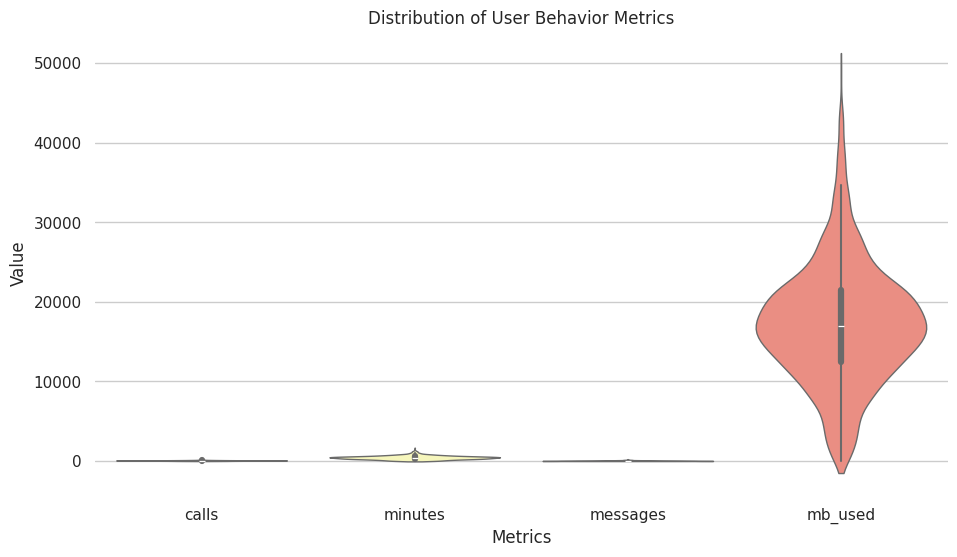

In [ ]:
# Set the seaborn theme
sns.set_theme(style="whitegrid")

# Create a violin plot for the first four columns of the 'users_behavior' dataframe
f, ax = plt.subplots(figsize=(11, 6))
sns.violinplot(data=users_behavior[['calls', 'minutes', 'messages', 'mb_used']], palette="Set3", bw=.2, cut=1, linewidth=1)

# Add a title and x-axis label
ax.set_title('Distribution of User Behavior Metrics')
ax.set_xlabel('Metrics')
ax.set_ylabel('Value')

# Finalize the figure
ax.set(ylim=None)  # Set the y-axis limits to auto
sns.despine(left=True, bottom=True)
plt.show()

**Comment:** A wide or latitudinal violin plot was implemented to show the distributions of multiple metrics at the same time. The initial finding is that the ['mb_used'] column should be plotted on its own to avoid the distortion that is show. I ran these separately, but found that there is no insight that can be immediately gleaned, so went back and added the .describe() function abve to get more data points.

**Insight:** The descriptive stats are helpful to determine the scale with which each of the data from the plots are on. It confirms that the lenghs of the lists are the same size. We also see high relative variation as determined by comparing the standard deviation (one sigma) to the mean which then corresponds to the max and min bars in the violin plots.

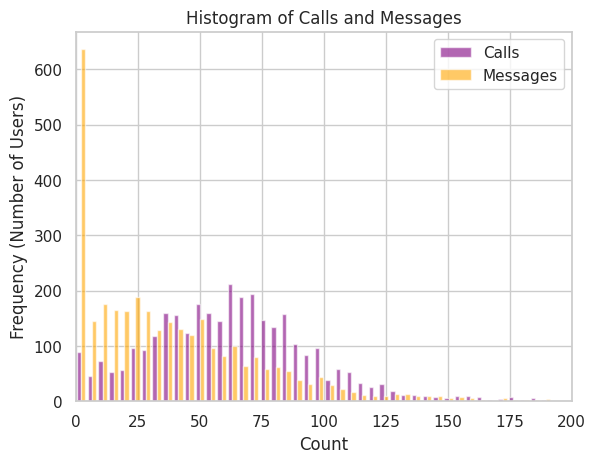


Skewness: 0.6060892767458539
The data has a positive skew or right-tailed.
Skewness: 1.2951606233998842
The data has a positive skew or right-tailed.


In [ ]:
# Histogram
plt.hist([users_behavior['calls'], users_behavior['messages']], bins=56, label=['Calls', 'Messages'],
         color=['purple', 'orange'], alpha = 0.6)  # added color parameter
plt.xlabel('Count')
plt.ylabel('Frequency (Number of Users)')
plt.title('Histogram of Calls and Messages')
plt.xlim(0, 200)  # added x-axis limit
plt.legend()
plt.show()
print()

# Calculate skewness
def calculate_skewness(data, column):
    skew = stats.skew(data[column])
    if skew == 0:
        interpretation = "The data is symmetrical (like a normal distribution)."
    elif skew > 0:
        interpretation = "The data has a positive skew or right-tailed."
    else:
        interpretation = "The data has a negative skew or left-tailed."
    print(f"Skewness: {skew}")
    print(interpretation)

calculate_skewness(users_behavior, 'calls')
calculate_skewness(users_behavior, 'messages')

**Comment:** I find multi-series datasets the most helpful when conducting exploratory data analysis. When we first looked at the Megaline data, there were two plans based on utilization, so I wanted to see if there was a distinct enough trend to classify two groups this early on in the analysis. The number of calls and number of texts were the most comparable metrics for user behavior based on my assumption. I iterated upon the initial graph with a final determination of skewness. Bins = SQRT(n).

**Insight:** There is some evidence for a trade-off point between users with high utilization of text messages and an upswing in the calls that are being made, however, it is not clear with this plot whether they are mutually exclusive.

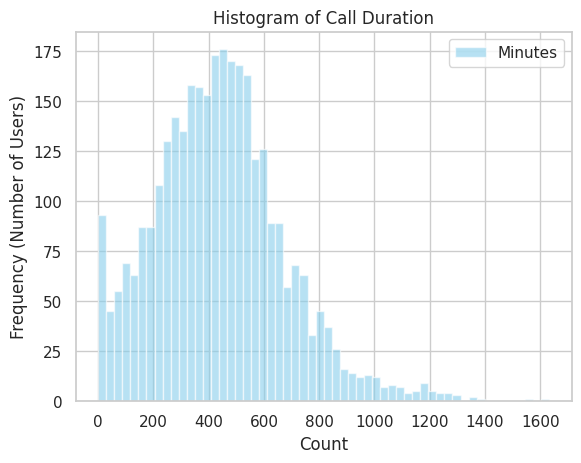


Skewness: 0.6075675435633564
The data has a positive skew or right-tailed.


In [ ]:
# Histogram
plt.hist(users_behavior['minutes'], bins=56, label=['Minutes'],
         color=['skyblue'], alpha = 0.6)  # added color parameter
plt.xlabel('Count')
plt.ylabel('Frequency (Number of Users)')
plt.title('Histogram of Call Duration')
plt.legend()
plt.show()
print()

# Calculate skewness
calculate_skewness(users_behavior, 'minutes')

**Insight:** The majority of users have a call duration of 200 to 800 minutes.

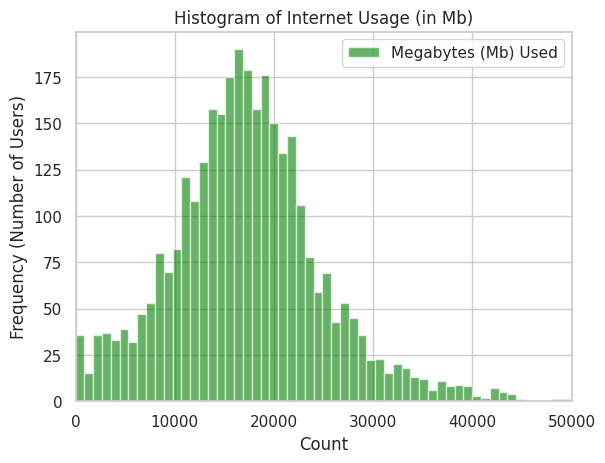


Skewness: 0.42989027518742406
The data has a positive skew or right-tailed.


In [ ]:
# Histogram
plt.hist(users_behavior['mb_used'], bins=56, label=['Megabytes (Mb) Used'],
         color=['green'], alpha = 0.6)  # added color parameter
plt.xlabel('Count')
plt.ylabel('Frequency (Number of Users)')
plt.title('Histogram of Internet Usage (in Mb)')
plt.xlim(0, 50000)  # added x-axis limit
plt.legend()
plt.show()
print()

# Calculate skewness
calculate_skewness(users_behavior, 'mb_used')

**Insight:** Majority of internet utilization is between 10,000 and 22,000 mb. There is less skewness compared to the previous plots.

# **Step 4: Model Training**

The models to be evaluated and prioritized for hyperparametric tuning:
  1.   Classification
      *   Decision Tree
      *   Random Forest
      *   Logistic Regression
  2.   Regression
      *   Decision Tree
      *   Random Forest
      *   Linear

In [27]:
from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor
from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor
from sklearn.linear_model import LogisticRegression, LinearRegression

from sklearn.model_selection import train_test_split

from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, mean_absolute_error, mean_squared_error

In [ ]:
users_behavior_train, users_behavior_valid = train_test_split(users_behavior, test_size=0.25, random_state=12345)

In [ ]:
features_train = users_behavior_train.drop(['is_ultra'], axis=1)
target_train = users_behavior_train['is_ultra']
features_valid = users_behavior_valid.drop(['is_ultra'], axis=1)
target_valid = users_behavior_valid['is_ultra']

## Step 4.1: Decision Tree Classifier

    Args:
    class sklearn.tree.DecisionTreeClassifier(*, criterion='gini', splitter='best', max_depth=None, min_samples_split=2, min_samples_leaf=1, min_weight_fraction_leaf=0.0, max_features=None, random_state=None, max_leaf_nodes=None, min_impurity_decrease=0.0, class_weight=None, ccp_alpha=0.0, monotonic_cst=None)
    
    #https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html#decisiontreeclassifier

In [24]:
# Decision Tree Classifier

best_score_dt = 0
best_depth = 0
best_precision_dt = 0
best_recall_dt = 0
best_f1_dt = 0

for depth in range(1,10):
    model = DecisionTreeClassifier(max_depth=depth, random_state=12345)
    model.fit(features_train, target_train)
    predictions_valid = model.predict(features_valid)

    score = accuracy_score(target_valid, predictions_valid)
    precision = precision_score(target_valid, predictions_valid)
    recall = recall_score(target_valid, predictions_valid)
    f1 = f1_score(target_valid, predictions_valid)

    print('Model accuracy at max_depth =', depth, ': ', end='')
    print(score)
    print('Model precision at max_depth =', depth, ': ', end='')
    print(precision)
    print('Model recall at max_depth =', depth, ': ', end='')
    print(recall)
    print('Model F1-score at max_depth =', depth, ': ', end='')
    print(f1)
    print()

    if score > best_score_dt:
        best_score_dt = score
        best_depth = depth
        best_precision_dt = precision
        best_recall_dt = recall
        best_f1_dt = f1

print()
print("Accuracy of the best model on the validation set (max_depth = {}): {}".format(best_depth, best_score_dt))
print("Precision of the best model on the validation set (max_depth = {}): {}".format(best_depth, best_precision_dt))
print("Recall of the best model on the validation set (max_depth = {}): {}".format(best_depth, best_recall_dt))
print("F1-Score of the best model on the validation set (max_depth = {}): {}".format(best_depth, best_f1_dt))

final_model1 = DecisionTreeClassifier(random_state=12345, max_depth=best_depth)
final_model1.fit(features_train, target_train)

Model accuracy at max_depth = 1 : 0.75
Model precision at max_depth = 1 : 0.7222222222222222
Model recall at max_depth = 1 : 0.2697095435684647
Model F1-score at max_depth = 1 : 0.3927492447129909

Model accuracy at max_depth = 2 : 0.7835820895522388
Model precision at max_depth = 2 : 0.7637795275590551
Model recall at max_depth = 2 : 0.4024896265560166
Model F1-score at max_depth = 2 : 0.5271739130434784

Model accuracy at max_depth = 3 : 0.7885572139303483
Model precision at max_depth = 3 : 0.7591240875912408
Model recall at max_depth = 3 : 0.4315352697095436
Model F1-score at max_depth = 3 : 0.5502645502645502

Model accuracy at max_depth = 4 : 0.7810945273631841
Model precision at max_depth = 4 : 0.7480916030534351
Model recall at max_depth = 4 : 0.4066390041493776
Model F1-score at max_depth = 4 : 0.5268817204301075

Model accuracy at max_depth = 5 : 0.7810945273631841
Model precision at max_depth = 5 : 0.7480916030534351
Model recall at max_depth = 5 : 0.4066390041493776
Model F1

DecisionTreeClassifier(max_depth=7, random_state=12345)

### Step 4.1.1: Conclusion

In this model, I set 'max_depth' to iterate from 1 to 10 to evaluate this parameter's effect on the accuracy. I also learned that accuracy, precision, and F-1 score can only be applied to classification models. If this model is the best, I plan to tune the criterion hyperparameter next.

The optimal model is at max_depth = 7.

## Step 4.2: Random Forest Classifier

    Args:
    class sklearn.ensemble.RandomForestClassifier(n_estimators=100, *, criterion='gini', max_depth=None, min_samples_split=2, min_samples_leaf=1, min_weight_fraction_leaf=0.0, max_features='sqrt', max_leaf_nodes=None, min_impurity_decrease=0.0, bootstrap=True, oob_score=False, n_jobs=None, random_state=None, verbose=0, warm_start=False, class_weight=None, ccp_alpha=0.0, max_samples=None, monotonic_cst=None)
    
    #https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html#randomforestclassifier

In [25]:
# Random Forest Classifier

best_score_rf = 0
best_est = 0
best_precision_rf = 0
best_recall_rf = 0
best_f1_rf = 0

for est in range(1, 10):
    model = RandomForestClassifier(random_state = 12345, n_estimators = est)
    model.fit(features_train, target_train)
    predictions_valid = model.predict(features_valid)
    score = accuracy_score(target_valid, predictions_valid)
    precision = precision_score(target_valid, predictions_valid)
    recall = recall_score(target_valid, predictions_valid)
    f1 = f1_score(target_valid, predictions_valid)

    print('Model accuracy at n_estimators =', est, ': ', end='')
    print(score)
    print('Model precision at n_estimators =', est, ': ', end='')
    print(precision)
    print('Model recall at n_estimators =', est, ': ', end='')
    print(recall)
    print('Model F1-score at n_estimators =', est, ': ', end='')
    print(f1)
    print()

    if score > best_score_rf:
        best_score_rf = score
        best_est = est
        best_precision_rf = precision
        best_recall_rf = recall
        best_f1_rf = f1

print()
print("Accuracy of the best model on the validation set (n_estimators = {}): {}".format(best_est, best_score_rf))
print("Precision of the best model on the validation set (n_estimators = {}): {}".format(best_est, best_precision_rf))
print("Recall of the best model on the validation set (n_estimators = {}): {}".format(best_est, best_recall_rf))
print("F1-Score of the best model on the validation set (n_estimators = {}): {}".format(best_est, best_f1_rf))

final_model2 = RandomForestClassifier(random_state=12345, n_estimators=best_est)
final_model2.fit(features_train, target_train)

Model accuracy at n_estimators = 1 : 0.736318407960199
Model precision at n_estimators = 1 : 0.5662100456621004
Model recall at n_estimators = 1 : 0.5145228215767634
Model F1-score at n_estimators = 1 : 0.5391304347826086

Model accuracy at n_estimators = 2 : 0.7736318407960199
Model precision at n_estimators = 2 : 0.7521367521367521
Model recall at n_estimators = 2 : 0.3651452282157676
Model F1-score at n_estimators = 2 : 0.4916201117318435

Model accuracy at n_estimators = 3 : 0.7649253731343284
Model precision at n_estimators = 3 : 0.6382978723404256
Model recall at n_estimators = 3 : 0.4979253112033195
Model F1-score at n_estimators = 3 : 0.5594405594405595

Model accuracy at n_estimators = 4 : 0.7860696517412935
Model precision at n_estimators = 4 : 0.7284768211920529
Model recall at n_estimators = 4 : 0.45643153526970953
Model F1-score at n_estimators = 4 : 0.5612244897959183

Model accuracy at n_estimators = 5 : 0.7786069651741293
Model precision at n_estimators = 5 : 0.67213114

RandomForestClassifier(n_estimators=4, random_state=12345)

### Step 4.2.1: Conclusion

Here, we use the random forest classification model where the main parameter was the n_estimators ('*number of trees*'). Iterating from 0 to 9, it finds that 4 estimators results in the best accuracy

## Step 4.3: Logistic Regression

In logistic regression, the goal is to predict the probability of an event occurring (e.g., 1 or 0), rather than predicting a continuous value. Therefore, evaluation metrics that are specifically designed for classification problems, such as accuracy, precision, recall, F1-score, and ROC-AUC, are more suitable.

    Args:
    class sklearn.linear_model.LogisticRegression(penalty='l2', *, dual=False, tol=0.0001, C=1.0, fit_intercept=True, intercept_scaling=1, class_weight=None, random_state=None, solver='lbfgs', max_iter=100, multi_class='deprecated', verbose=0, warm_start=False, n_jobs=None, l1_ratio=None)
    
    #https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html#logisticregression

In [26]:
def run_all_solvers(features_train, target_train, features_valid, target_valid):
  solvers = ['liblinear', 'newton-cg', 'lbfgs', 'sag', 'saga']
  for solver in solvers:
    model = LogisticRegression(random_state=12345, solver=solver)
    model.fit(features_train, target_train)

    # Predict on validation set
    y_pred = model.predict(features_valid)

    # Calculate classification metrics
    precision = precision_score(target_valid, y_pred)
    recall = recall_score(target_valid, y_pred)
    f1 = f1_score(target_valid, y_pred)

    # Print results
    print(f"Solver: {solver}")
    print(f"Accuracy of the logistic regression model on the training set: {model.score(features_train, target_train):.4f}")
    print(f"Accuracy of the logistic regression model on the validation set: {model.score(features_valid, target_valid):.4f}")
    print(f"Precision: {precision:.4f}")
    print(f"Recall: {recall:.4f}")
    print(f"F1-Score: {f1:.4f}")
    print()

# Run the function with your data (replace with your actual data)
# ... (assuming features_train, target_train, features_valid, target_valid are defined)
run_all_solvers(features_train, target_train, features_valid, target_valid)


Solver: liblinear
Accuracy of the logistic regression model on the training set: 0.7415
Accuracy of the logistic regression model on the validation set: 0.7537
Precision: 0.8772
Recall: 0.2075
F1-Score: 0.3356



/usr/local/lib/python3.10/dist-packages/scipy/optimize/_linesearch.py:466: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/usr/local/lib/python3.10/dist-packages/scipy/optimize/_linesearch.py:314: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/usr/local/lib/python3.10/dist-packages/scipy/optimize/_linesearch.py:425: LineSearchWarning: Rounding errors prevent the line search from converging
  warn(msg, LineSearchWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/utils/optimize.py:203: UserWarning: Line Search failed
  warnings.warn("Line Search failed")


Solver: newton-cg
Accuracy of the logistic regression model on the training set: 0.7469
Accuracy of the logistic regression model on the validation set: 0.7600
Precision: 0.8871
Recall: 0.2282
F1-Score: 0.3630

Solver: lbfgs
Accuracy of the logistic regression model on the training set: 0.7025
Accuracy of the logistic regression model on the validation set: 0.7040
Precision: 0.6364
Recall: 0.0290
F1-Score: 0.0556

Solver: sag
Accuracy of the logistic regression model on the training set: 0.6913
Accuracy of the logistic regression model on the validation set: 0.7002
Precision: 0.0000
Recall: 0.0000
F1-Score: 0.0000

Solver: saga
Accuracy of the logistic regression model on the training set: 0.6913
Accuracy of the logistic regression model on the validation set: 0.7002
Precision: 0.0000
Recall: 0.0000
F1-Score: 0.0000



/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


### Step 4.3.1: Conclusion

This was one of the more challenging models to assess because of the complexity of the hyperparameters. I decided to iterate through the solver options by makign them into a list. The result was that the newton-cg optimization was ideal, followed by liblinear, then lbfgs – all of which are optimization functions with different recommended uses. The documentation predicted that liblinear would be the best, but for this exercise I am using Precision as the primary metric, then recall and F-score as a composite score.

## Step 4.4: Decision Tree Regression

    Args:
    class sklearn.tree.DecisionTreeRegressor(*, criterion='squared_error', splitter='best', max_depth=None, min_samples_split=2, min_samples_leaf=1, min_weight_fraction_leaf=0.0, max_features=None, random_state=None, max_leaf_nodes=None, min_impurity_decrease=0.0, ccp_alpha=0.0, monotonic_cst=None)
    
    #https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeRegressor.html#decisiontreeregressor

In [28]:
# Decision Tree Regression

best_score_dt_mse = float('inf')  # Initialize with infinity
best_score_dt_mae = float('inf')  # Initialize with infinity
best_score_dt_mase = float('inf')  # Initialize with infinity
best_depth = 0

for depth in range(1, 10):
    model = DecisionTreeRegressor(max_depth=depth, random_state=12345)
    model.fit(features_train, target_train)
    predictions_valid = model.predict(features_valid)

    mse = mean_squared_error(target_valid, predictions_valid)
    mae = mean_absolute_error(target_valid, predictions_valid)
    mase = mae / mean_absolute_error(target_valid, [target_valid.mean()] * len(target_valid))

    print('Model MSE at max_depth =', depth, ': ', end='')
    print(mse)
    print('Model MAE at max_depth =', depth, ': ', end='')
    print(mae)
    print('Model MASE at max_depth =', depth, ': ', end='')
    print(mase)

    if mse < best_score_dt_mse:
        best_score_dt_mse = mse
        best_score_dt_mae = mae
        best_score_dt_mase = mase
        best_depth = depth

print()
print("MSE of the best model on the validation set (max_depth = {}): {}".format(best_depth, best_score_dt_mse))
print("MAE of the best model on the validation set (max_depth = {}): {}".format(best_depth, best_score_dt_mae))
print("MASE of the best model on the validation set (max_depth = {}): {}".format(best_depth, best_score_dt_mase))
print()

final_model3 = DecisionTreeRegressor(random_state=12345, max_depth=best_depth)
final_model3.fit(features_train, target_train)

Model MSE at max_depth = 1 : 0.1881053579837439
Model MAE at max_depth = 1 : 0.3733462318039433
Model MASE at max_depth = 1 : 0.8893412504800813
Model MSE at max_depth = 2 : 0.1679407026061912
Model MAE at max_depth = 2 : 0.3367183778869814
Model MASE at max_depth = 2 : 0.8020907076059305
Model MSE at max_depth = 3 : 0.16278381779761109
Model MAE at max_depth = 3 : 0.31973814948393026
Model MASE at max_depth = 3 : 0.7616424151765668
Model MSE at max_depth = 4 : 0.16242151586792403
Model MAE at max_depth = 4 : 0.3122140612380063
Model MASE at max_depth = 4 : 0.7437194217743824
Model MSE at max_depth = 5 : 0.16152323478203273
Model MAE at max_depth = 5 : 0.30317119860317976
Model MASE at max_depth = 5 : 0.7221785835965928
Model MSE at max_depth = 6 : 0.16430594443941385
Model MAE at max_depth = 6 : 0.2969756335662203
Model MASE at max_depth = 6 : 0.7074202411036822
Model MSE at max_depth = 7 : 0.16749775987444526
Model MAE at max_depth = 7 : 0.29035587710663524
Model MASE at max_depth = 

DecisionTreeRegressor(max_depth=5, random_state=12345)

### Step 4.4.1: Conclusion

Here, we switch to a sklearn set of regressions that were covered in the Triple Ten course. I wrote it in a way that the MSE, MAE, and MASE are evaluated for each of the max_depth iterations so that the best can be identified. The metrics are not comparable to those used in the classification models. We aim for MSE and MAE = [0 | 0, 1] and MASE = [0, 1 | 1], so the model is ok at best.


## Step 4.5: Random Forest Regression

    Args:
    class sklearn.ensemble.RandomForestRegressor(n_estimators=100, *, criterion='squared_error', max_depth=None, min_samples_split=2, min_samples_leaf=1, min_weight_fraction_leaf=0.0, max_features=1.0, max_leaf_nodes=None, min_impurity_decrease=0.0, bootstrap=True, oob_score=False, n_jobs=None, random_state=None, verbose=0, warm_start=False, ccp_alpha=0.0, max_samples=None, monotonic_cst=None)
    
    #https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestRegressor.html#randomforestregressor

In [ ]:
# Random Forest Regression

best_model = None
best_score_dt_mse = 10000
best_score_dt_mae = 10000
best_score_dt_mase = 10000
best_depth = 0
best_est = 0
for depth in range (1, 11):
    for est in range(10, 51, 10):
        model = RandomForestRegressor(random_state=12345, n_estimators=est, max_depth=depth)
        model.fit(features_train, target_train)
        predictions_valid = model.predict(features_valid)

        mse = mean_squared_error(target_valid, predictions_valid)
        mae = mean_absolute_error(target_valid, predictions_valid)
        mase = mae / mean_absolute_error(target_valid, [target_valid.mean()] * len(target_valid))

        print('Model MSE at max_depth =', depth, 'and n_estimators =', est, ': ', end='')
        print(mse)
        print('Model MAE at max_depth =', depth, 'and n_estimators =', est, ': ', end='')
        print(mae)
        print('Model MASE at max_depth =', depth, 'and n_estimators =', est, ': ', end='')
        print(mase)

        if mse < best_score_dt_mse:
            best_score_dt_mse = mse
            best_score_dt_mae = mae
            best_score_dt_mase = mase
            best_depth = depth
            best_est = est

print()
print("MSE of the best model on the validation set (max_depth = {} and n_estimators = {}): {}".format(best_depth, best_est, best_score_dt_mse))
print("MAE of the best model on the validation set (max_depth = {} and n_estimators = {}): {}".format(best_depth, best_est, best_score_dt_mae))
print("MASE of the best model on the validation set (max_depth = {} and n_estimators = {}): {}".format(best_depth, best_est, best_score_dt_mase))
print()

final_model4 = RandomForestRegressor(random_state=12345, n_estimators=best_est, max_depth=best_depth)
final_model4.fit(features_train, target_train)

Model MSE at max_depth = 1 and n_estimators = 10 : 0.18038746585481125
Model MAE at max_depth = 1 and n_estimators = 10 : 0.37341294706081235
Model MASE at max_depth = 1 and n_estimators = 10 : 0.8895001716768572
Model MSE at max_depth = 1 and n_estimators = 20 : 0.1799633673432735
Model MAE at max_depth = 1 and n_estimators = 20 : 0.3723234746440889
Model MASE at max_depth = 1 and n_estimators = 20 : 0.8869049593004773
Model MSE at max_depth = 1 and n_estimators = 30 : 0.18214655344997355
Model MAE at max_depth = 1 and n_estimators = 30 : 0.3725071741303293
Model MASE at max_depth = 1 and n_estimators = 30 : 0.8873425464967273
Model MSE at max_depth = 1 and n_estimators = 40 : 0.1822265638427286
Model MAE at max_depth = 1 and n_estimators = 40 : 0.37213822735672913
Model MASE at max_depth = 1 and n_estimators = 40 : 0.8864636851154064
Model MSE at max_depth = 1 and n_estimators = 50 : 0.1831012629914027
Model MAE at max_depth = 1 and n_estimators = 50 : 0.37189158915262177
Model MASE 

RandomForestRegressor(max_depth=9, n_estimators=30, random_state=12345)

### Step 4.5.1: Conclusion

In this example, the model is tested in a partial factorial experiment where max_depth and n_estimators are tuned at the same time. Here, the results are complex because of the criteria previously specified in 4.4.1, however it is conclusively a more poor model across the three metrics.

## Step 4.6: Linear Regression

    Args:
    class sklearn.linear_model.LinearRegression(*, fit_intercept=True, copy_X=True, n_jobs=None, positive=False)
    
    #https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html#linearregression

In [32]:
#Linear Regression

best_model = None
best_score_dt_mse = float('inf')  # Initialize with infinity
best_score_dt_mae = float('inf')
best_score_dt_mase = float('inf')

model = LinearRegression() # initialize model constructor
model.fit(features_train, target_train) # train model on training set
predictions_valid = model.predict(features_valid) # get model predictions on validation set

mse = mean_squared_error(target_valid, predictions_valid)
mae = mean_absolute_error(target_valid, predictions_valid)
mase = mae / mean_absolute_error(target_valid, [target_valid.mean()] * len(target_valid))


# Check if this model is better than the current best model
if mse < best_score_dt_mse:
    best_model = model
    best_score_dt_mse = mse
    best_score_dt_mae = mae
    best_score_dt_mase = mase

print()
print("MSE of the best model on the validation set: {}".format(best_score_dt_mse))
print("MAE of the best model on the validation set: {}".format(best_score_dt_mae))
print("MASE of the best model on the validation set: {}".format(best_score_dt_mase))
print()

final_model = best_model
final_model.fit(features_train, target_train)


MSE of the best model on the validation set: 0.19172411540231815
MAE of the best model on the validation set: 0.3850504877330112
MASE of the best model on the validation set: 0.917221745091213



LinearRegression()

### Step 4.6.1 : Model Prioritization

Conclusively, the results  were as follows:
  1.   Classification (Accuracy, Precision, Recall, F-1)
      *   Decision Tree: 0.790, 0.757, 0.440, 0.556
      *   Random Forest: 0.786, 0.728, 0.456, 0.561
      *   Logistic Regression: 0.760, 0.887, 0.228, 0.363
  2.   Regression (MSE, MAE, and MASE)
      *   Decision Tree: 0.161, 0.303, 0.722
      *   Random Forest: 0.149, 0.278, 0.662
      *   Linear: 0.192, 0.385, 0.917

In [33]:
# Classification Results
classification_results = {
    'Decision Tree': [0.790, 0.757, 0.440, 0.556],
    'Random Forest': [0.786, 0.728, 0.456, 0.561],
    'Logistic Regression': [0.760, 0.887, 0.228, 0.363]
}

# Create a DataFrame from the classification results
classification_df = pd.DataFrame.from_dict(classification_results, orient='index', columns=['Accuracy', 'Precision', 'Recall', 'F1-Score'])

# Calculate the composite score
classification_df['Composite Score'] = (classification_df['Accuracy'] + classification_df['Precision'] + classification_df['Recall'] + classification_df['F1-Score']) / 4

# Identify the best model based on the composite score
best_classification_model = classification_df['Composite Score'].idxmax()

print(f"Classification Results:\n{classification_df}")
print(f"\nBest Classification Model: {best_classification_model}")

# Regression Results
regression_results = {
    'Decision Tree': [0.161, 0.303, 0.722],
    'Random Forest': [0.149, 0.278, 0.662],
    'Linear': [0.192, 0.385, 0.917]
}

# Create a DataFrame from the regression results
regression_df = pd.DataFrame.from_dict(regression_results, orient='index', columns=['MSE', 'MAE', 'MASE'])

# Calculate the composite score
regression_df['Composite Score'] = (1/regression_df['MSE'] + 1/regression_df['MAE'] + 1/regression_df['MASE']) / 3

# Identify the best model based on the composite score
best_regression_model = regression_df['Composite Score'].idxmax()

print(f"\nRegression Results:\n{regression_df}")
print(f"\nBest Regression Model: {best_regression_model}")

Classification Results:
                     Accuracy  Precision  Recall  F1-Score  Composite Score
Decision Tree           0.790      0.757   0.440     0.556          0.63575
Random Forest           0.786      0.728   0.456     0.561          0.63275
Logistic Regression     0.760      0.887   0.228     0.363          0.55950

Best Classification Model: Decision Tree

Regression Results:
                 MSE    MAE   MASE  Composite Score
Decision Tree  0.161  0.303  0.722         3.632184
Random Forest  0.149  0.278  0.662         3.939702
Linear         0.192  0.385  0.917         2.965416

Best Regression Model: Random Forest


### Step 4.6.2 : Conclusion

Lastly, the linear model indicates that it has signiificantly better MASE than the other two but comparable MSE and MAE. Due to this similarity and the poignancy of the last metric, I initially thought it would be the best model. However, I decided to implement a composite score which I later realized could be weighted based on the business need. So, I will move into the next section with the model for DecisionTreeClassifier and RandomForestRegressor based on the original data users_behavior.

# **Step 5: Hyperparametric Tuning**




## Step 5.1: DecisionTreeClassifer

In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import make_scorer

In [36]:
# Define the hyperparameter grid
param_grid = {
    'max_depth': range(1, 10),
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 5, 10],
    'criterion': ['gini', 'entropy']
}

# Define the composite score
def composite_score(y_true, y_pred):
    accuracy = accuracy_score(y_true, y_pred)
    precision = precision_score(y_true, y_pred)
    recall = recall_score(y_true, y_pred)
    f1 = f1_score(y_true, y_pred)
    return 0.2 * accuracy + 0.3 * precision + 0.3 * recall + 0.2 * f1

# Create a scorer for the composite score
composite_scorer = make_scorer(composite_score)

# Initialize the Decision Tree Classifier
dtc = DecisionTreeClassifier(random_state=12345)

# Perform grid search with cross-validation
grid_search = GridSearchCV(dtc, param_grid, cv=5, scoring={'accuracy': 'accuracy', 'precision': 'precision', 'recall': 'recall', 'f1': 'f1', 'composite': composite_scorer}, refit='composite')
grid_search.fit(features_train, target_train)

# Get the best hyperparameters and the corresponding scores
best_params = grid_search.best_params_
best_score = grid_search.best_score_
best_accuracy = grid_search.cv_results_['mean_test_accuracy'][grid_search.best_index_]
best_precision = grid_search.cv_results_['mean_test_precision'][grid_search.best_index_]
best_recall = grid_search.cv_results_['mean_test_recall'][grid_search.best_index_]
best_f1 = grid_search.cv_results_['mean_test_f1'][grid_search.best_index_]
best_composite = grid_search.cv_results_['mean_test_composite'][grid_search.best_index_]

print("Best hyperparameters:", best_params)
print("Best score (composite):", best_score)
print("Best accuracy:", best_accuracy)
print("Best precision:", best_precision)
print("Best recall:", best_recall)
print("Best F1-score:", best_f1)
print("Best composite score:", best_composite)

# Train the final model with the best hyperparameters
final_model = DecisionTreeClassifier(**best_params)
final_model.fit(features_train, target_train)

Best hyperparameters: {'criterion': 'entropy', 'max_depth': 7, 'min_samples_leaf': 1, 'min_samples_split': 10}
Best score (composite): 0.6680109950110754
Best accuracy: 0.8033195020746888
Best precision: 0.7920183984869482
Best recall: 0.49457645565028113
Best F1-score: 0.6068431917748439
Best composite score: 0.6680109950110754


DecisionTreeClassifier(criterion='entropy', max_depth=7, min_samples_split=10)

## Step 5.1.1: Conclusion

The best hyperparameters were defined as: {'criterion': 'entropy', 'max_depth': 7, 'min_samples_leaf': 1, 'min_samples_split': 10}. They significantly imporved the model accuracy and composite score as well as all of the other metrics.

## Step 5.2: RandomForestRegressor

##Step 5.2.1: Conclusion

This did not work for some reason it was unable to accomodate the other metrics. I tried multiple different approaches and all of them resulted in a continuous error that I had to shut off after about a minute or two. The results were inconclusive.

# **General Conclusion**

I found this exercise extremely fulfilling. I have been wanting to do this for some time and feel that I did a thorough job. However, I am still curious and would like to work through the other models in a similar fashion. The results were that DecisionTreeClassifier was the best of the models tested though it underfit in my opinion. This also highlights the challenge of closing the gap in precision and accuracy from 80% to 100%.

This model suggests the presence of linear or piecewise linear relationships in the data. The next improvement is incorporating ensemble methods like gradient boosting to improve the accuracy. I identified some additional ways to improve the research, however, I would also like to see the effect of more features or multiple datasets feeding into the same model if posssible.

**Try more complex models, such as:**
  *   Support Vector Machines (SVMs)
  *   Gradient Boosting Machines (GBMs)
  *   Neural Networks (if you have a large dataset and computational resources)

**Tune hyperparameters for each model using techniques like:**
  *   Grid Search
  *   Random Search
  *   Bayesian Optimization

Experiment with different feature engineering techniques, such as:
  *   Feature selection
  *   Feature extraction
  *   Dimensionality reduction


Thanks for reading! 🍻

##### Additional resources: https://www.saedsayad.com/decision_tree.htm, https://towardsdatascience.com/decision-tree-classifier-explained-in-real-life-picking-a-vacation-destination-6226b2b60575